# Story Judge -- An ML Classifier

# 1 Author

**Student Name**:  Youhao Zhong

**Student ID**:  (QM)221170526, (BUPT)2022213676



# 2 Problem formulation

There are many true and deceptive stories and the purpose is to distinguish them. Each story has a corresponding true/deceptive label. The machine learning problem here is classify the (wav) stories into 2 classes. Obviously it is a supervised learning problem. Although this is just a binary classification problem, it is easier said than done.

- Audio files can provide us with a lot of information, but it is precisely because of the large amount of information that effective features are difficult to extract reasonably
- The classification of true and false stories may involve advanced information such as the narrator's tone, emotions, and expression, which may be difficult to capture through simple audio features.
- The difference between true and false stories can be very subtle, and even difficult to judge artificially. By only changing a detail, a true story can be transformed to be deceptive.

# 3 Methodology

### This project tried to solve this problem from 2 different dimensions of features.
- With just 2 features: mean pitch and volume. In order to visually analyze the various performance of the model.
- With 26 features, including pause features, language, high-frequency energy ratio, etc.


### 3.1 Training

#### 2 Features:
- Logistic Regression
  1. Input training data $X$ (feature matrix) and $Y$ (target label).
  2. Define loss function
  3. Use optimization algorithms (such as gradient descent) to iteratively update the weight $w$ until the loss function converges.

- KNN: Identify the boundary by calculating the distance between the point to be classified and all training samples. 
  1. KNN does not have an explicit model, and only saves training samples during the training phase. These samples are used for classification during the prediction phase.
  2. Use grid search to find the optimal $K$.
   

####  26 Features:

- Random Forest:
  1. Build multiple decision trees: Randomly sampling from training data. During the training process of each tree, randomly select a subset of features for splitting
  2. Learn the classification rules for each tree: Each tree will find the optimal splitting point based on its sampled data and features, and generate a complete decision tree. Save multiple weak classifiers (decision trees) for prediction.
  3. Input the test samples into all decision trees and obtain the classification results for each tree.Conduct a majority vote on the predicted results of all decision trees to determine the final classification.
  4. Soft voting: using logistic regression and combine it with the random forest model, where the final prediction is based on the weighted average of predicted probabilities from each model.
  
### 3.2 Validation

**Evaluate the performance of each model through the following indicators:**

1. **Accuracy**
   $$
   \text{Accuracy} = \frac{\text{correctly classified samples}}{\text{total samples}}
   $$
2. **Confusion Matrix(sensitivity, specificity, precision...)**
   Display the classification results of the model in different categories. Used to analyze the distribution of model classification errors.
3. **ROC and AUC**
4. In Random Forest, **Feature Importance** to evaluate the contribution of features to model decision-making can help explain the model.

# 4 Implemented ML prediction pipelines

Describe the ML prediction pipelines that you will explore. Clearly identify their input and output, stages and format of the intermediate data structures moving from one stage to the next. It's up to you to decide which stages to include in your pipeline. After providing an overview, describe in more detail each one of the stages that you have included in their corresponding subsections (i.e. 4.1 Transformation stage, 4.2 Model stage, 4.3 Ensemble stage).

A machine learning prediction pipeline is a sequence of stages that transforms raw input data into meaningful predictions. Each stage processes the data and prepares it for the next step. For this task, the pipelines aim to classify stories as either "True" or "Deceptive" based on extracted audio and metadata features.

Pipeline Stages:

### Input Stage:
- Input: Raw audio files and metadata (e.g., language labels).
- Output: Processed features ready for further transformation.
### Transformation Stage:
- Input: Extracted audio features (numerical data).
- Output: Preprocessed and transformed data (scaled and standardized).
### Model Stage:
- Input: Transformed feature data.
- Output: Predicted probabilities or labels.
### Ensemble Stage:
- Input: Predictions from multiple models.
- Output: Final classification results based on ensemble voting or averaging.

***Each stage has a specific role, and intermediate data structures include numerical arrays, feature matrices, and prediction vectors.***

## 4.1 Transformation stage

Describe any transformations, such as feature extraction. Identify input and output. Explain why you have chosen this transformation stage.

### 4.1.1 Input
1. Raw audio files (wav): Represent the audio signals of the stories.
2. Metadata:
   - Language of the story (Chinese or English).
   - Story type (True or Deceptive, used as the label for supervised learning).

### 4.1.2 Transformations

- The main transformation is **Audio Feature Extraction**:

- The 2-feature version is simple, which just extract 2 features from the audio: mean pitch and volume.
- The 26-feature version:
  1. MFCC (Mel Frequency Cepstral Coefficients):13 coefficients capturing the short-term power spectrum of the audio signal.These features are widely used in speech and audio processing tasks as they model the characteristics of human speech perception.
  2. Pitch (Mean Pitch):Represents the average pitch of the audio signal, capturing the tone or intonation.May help differentiate between the natural flow of a true story and the constructed nature of a deceptive story.
  3. RMS Energy:Root Mean Square energy indicates the loudness or intensity of the audio.True stories might have more consistent energy, while deceptive stories might exhibit more variability.
  4. Spectral Features:Spectral Centroid: Indicates the center of mass of the audio's spectrum.Spectral Bandwidth: Represents the range of frequencies present in the audio.Spectral Contrast: Measures the difference between peaks and valleys in the spectrum.These features capture the tonal and harmonic characteristics of the audio.
  5. Dynamic Features:
   - Delta MFCC: First-order derivative of MFCC to capture temporal changes.
   - Delta2 MFCC: Second-order derivative of MFCC to capture acceleration in temporal changes.
  6. Pause Features:
   - Total Pause Time: Total duration of silence in the audio.
   - Number of Pauses: Count of pauses in the audio.
   - Average Pause Duration: Mean duration of each pause.
   - Max Pause Duration: Longest silence duration.
   - Pauses can indicate hesitation, which might correlate with deceptive storytelling.
  7. High-Frequency Energy Ratio:
   - Proportion of energy in high-frequency components of the audio.
   - Captures background noise or emotional arousal in the story delivery.

### 4.1.3 outputs
The output of this stage is a numerical feature matrix, where each row represents a single audio file and its associated features.

Example structure of the output feature vector for a single audio file:
```bash
[
    MFCC1, MFCC2, ..., MFCC13,  # 13 MFCC coefficients
    Pitch Mean,                 # 1 pitch feature
    RMS Energy,                 # 1 energy feature
    Spectral Centroid,          # 1 spectral feature
    Spectral Bandwidth,         # 1 spectral feature
    Spectral Contrast,          # 1 spectral feature
    Delta MFCC,                 # 1 dynamic feature
    Delta2 MFCC,                # 1 dynamic feature
    Total Pause Time,           # 1 pause feature
    Number of Pauses,           # 1 pause feature
    Avg Pause Duration,         # 1 pause feature
    Max Pause Duration,         # 1 pause feature
    High-Frequency Energy Ratio, # 1 high-frequency feature
    Language                    # 1 metadata feature
]
```

For 100 audio files, the feature matrix will have a shape of:

(100,26)


I chose pitch and volume(RMS) in the first version with fewer features because they are easy to parse and help with visual understanding and analysis. The next 26 features are because I believe they have a significant impact on determining the truth of a story

## 4.2 Model stage

Describe the ML model(s) that you will build. Explain why you have chosen them.

### Models to be build

#### 4.2.1 Logistic Regression

Logistic Regression is **simple** and **interpretable**.

#### 4.2.2 KNN

KNN is simple and effective for small-scale datasets.
It does not make assumptions about the data distribution, making it a flexible model.
Provides a non-parametric approach that can capture complex patterns in the data.

But its disadvantage is obvious: difficult to deal with large scale samples (or when the number of feathers are large).

#### Random Forest

Random Forest is a robust, non-linear model that performs well on diverse datasets.
Unlike KNN, it handles high-dimensional data effectively, making it suitable for our 26 extracted features.
It is resistant to overfitting due to the ensemble learning approach (combining multiple decision trees).
Provides feature importance, which helps us understand which features are most relevant to the classification.

## 4.3 Ensemble stage

Describe any ensemble approach you might have included. Explain why you have chosen them.

In the second part(26 features)
Ensemble Approach: **Voting Classifier(soft voting)**
Here using a Voting Classifier, which combines the predictions from multiple base models. Specifically, I employed soft voting, where the final prediction is based on the weighted average of predicted probabilities from each model. This ensures that models with more confident predictions have a stronger influence on the final decision.

Random Forest captures non-linearities and interactions between features, while Logistic Regression provides a stable, linear baseline model.
By combining their outputs, we reduce the likelihood of overfitting or underfitting that might occur when relying on a single model.

The ensemble approach was chosen because of its ability to leverage the complementary strengths of Random Forest and Logistic Regression. By combining a non-linear, tree-based model with a linear, probabilistic model, the Voting Classifier provides a balanced, robust, and interpretable solution(Relatively) to the classification problem. 

# 5 Dataset

Before coding, import all the necessary packages and load labels from the csv file.

In [304]:
# Core libraries
import numpy as np
import pandas as pd
import librosa

# Preprocessing and Feature Engineering
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from scipy.special import expit  # Logistic sigmoid function

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Model Tuning and Optimization
from sklearn.model_selection import GridSearchCV
import scipy.optimize

# Metrics and Evaluation
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc
)

# Visualization
import matplotlib.pyplot as plt

# Custom Class Definitions
from sklearn.base import BaseEstimator, ClassifierMixin

In [305]:
# Loading the data
csv_path = r"dataset/CBU0521DD_stories_attributes.csv"
data = pd.read_csv(csv_path)

data['file_path'] = r'dataset/CBU0521DD_stories/' + data['filename']

print(data.head())

    filename Language  Story_type                            file_path
0  00001.wav  Chinese  True Story  dataset/CBU0521DD_stories/00001.wav
1  00002.wav  Chinese  True Story  dataset/CBU0521DD_stories/00002.wav
2  00003.wav  Chinese  True Story  dataset/CBU0521DD_stories/00003.wav
3  00004.wav  Chinese  True Story  dataset/CBU0521DD_stories/00004.wav
4  00005.wav  Chinese  True Story  dataset/CBU0521DD_stories/00005.wav


## 5.1 Dataset A

**As mentioned earlier, this dataset only extracts two features(mean pitch & volume) to visually view the results**

In [306]:
def extract_simple_features(file_path):
    """
    extract simple features: mean_pitch and rms
    """
    try:
        y, sr = librosa.load(file_path, sr=None)
        # calculate pitch 
        pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
        pitches = pitches[magnitudes > np.median(magnitudes)]
        pitch_mean = np.mean(pitches) if len(pitches) > 0 else 0

        # mean rms(volume)
        rms = librosa.feature.rms(y=y).mean()

        return pitch_mean, rms
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None, None

In [307]:
features = []
labels = []

for _, row in data.iterrows():
    pitch_mean, rms_mean = extract_simple_features(row['file_path'])
    if pitch_mean is not None and rms_mean is not None:
        features.append([pitch_mean, rms_mean])
        labels.append(1 if row['Story_type'] == 'True Story' else 0)

# to numpy array
features = np.array(features)
labels = np.array(labels)

print(f"Shape of features: {features.shape}")

Shape of features: (100, 2)


In [308]:
#（60% Training，40% Testing）
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

print(f"Training set: {X_train.shape[0]}, Testing set: {X_test.shape[0]}")

Training set: 70, Testing set: 30


In [309]:
from sklearn.preprocessing import MinMaxScaler

# Min-Max normalization
scaler = MinMaxScaler()

X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

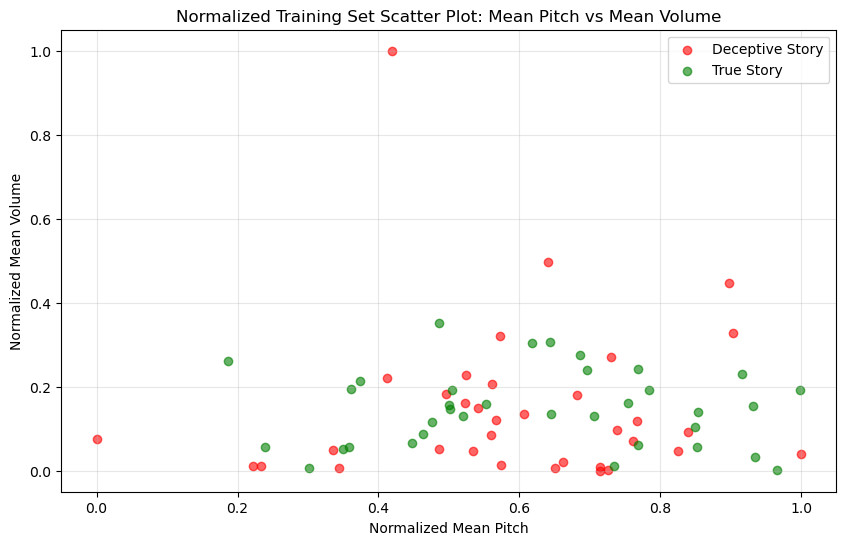

In [310]:
true_features_train_norm = X_train_normalized[y_train == 1]
deceptive_features_train_norm = X_train_normalized[y_train == 0]

# Draw
plt.figure(figsize=(10, 6))
plt.scatter(deceptive_features_train_norm[:, 0], deceptive_features_train_norm[:, 1], color='red', label='Deceptive Story', alpha=0.6)
plt.scatter(true_features_train_norm[:, 0], true_features_train_norm[:, 1], color='green', label='True Story', alpha=0.6)

plt.title('Normalized Training Set Scatter Plot: Mean Pitch vs Mean Volume')
plt.xlabel('Normalized Mean Pitch')
plt.ylabel('Normalized Mean Volume')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## 5.2 Dataset B

**As mentioned earlier, this dataset extracts 26 features to apply train a forest model**

In [311]:
def extract_advanced_features(file_path, language, energy_threshold=0.02, frame_length=2048, hop_length=512):
    """
    extract advanced features including：
    - MFCC (13)
    - RMS (mean volume)
    - MP (mean pitch)
    - Spectral centroid
    - Spectral bandwidth
    - Spectral comparison
    - Dynamic features (Delta MFCC, Delta2 MFCC)
    - Pause features (total pause time, pause frequency, average pause time, longest pause time)
    - High frequency energy ratio
    - Language（Chinese=0, English=1）
    """
    try:
        y, sr = librosa.load(file_path, sr=None)

        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).mean(axis=1)  # MFCC
        rms = librosa.feature.rms(y=y).mean()  # RMS
        pitches, magnitudes = librosa.piptrack(y=y, sr=sr)  # pitch
        pitches = pitches[magnitudes > np.median(magnitudes)]
        pitch_mean = np.mean(pitches) if len(pitches) > 0 else 0  # mean pitch

        # Spectral Features
        spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr).mean()
        spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr).mean()
        spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr).mean()

        # Dynamic Features
        delta_mfcc = librosa.feature.delta(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)).mean()
        delta2_mfcc = librosa.feature.delta(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13), order=2).mean()

        # Pause Features
        energy = librosa.feature.rms(y=y, frame_length=frame_length, hop_length=hop_length)[0]
        frames = np.arange(len(energy))
        times = librosa.frames_to_time(frames, sr=sr, hop_length=hop_length)
        pause_mask = energy < energy_threshold
        pause_times = times[pause_mask]
        pause_durations = np.diff(pause_times)
        pause_durations = pause_durations[pause_durations > 0]

        total_pause_time = np.sum(pause_durations)
        num_pauses = len(pause_durations)
        avg_pause_duration = np.mean(pause_durations) if num_pauses > 0 else 0
        max_pause_duration = np.max(pause_durations) if num_pauses > 0 else 0

        spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.85).mean()
        total_energy = np.sum(np.square(y))  # 总能量
        high_freq_energy = np.sum(np.square(y[np.abs(y) > spectral_rolloff]))
        high_freq_ratio = high_freq_energy / total_energy if total_energy > 0 else 0 

        # Merge
        features = np.hstack([
            mfccs, rms, pitch_mean,
            spectral_centroid, spectral_bandwidth, spectral_contrast,
            delta_mfcc, delta2_mfcc,
            total_pause_time, num_pauses, avg_pause_duration, max_pause_duration,
            high_freq_ratio,
            language
        ])

        return features

    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

In [312]:
features_more = []

for _, row in data.iterrows():
    file_path = row['file_path']
    language = 0 if row['Language'] == 'Chinese' else 1

    feature = extract_advanced_features(file_path, language)
    if feature is not None:
        features_more.append(feature)

features_more = np.array(features_more)

print(f"Shape of features: {features_more.shape}")

Shape of features: (100, 26)


In [313]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(features_more, labels, test_size=0.4, random_state=42)

print(f"Training set: {X_train.shape[0]}, Testing set: {X_test.shape[0]}")

Training set: 70, Testing set: 30


In [314]:
X_train_normalized2 = scaler.fit_transform(X_train2)
X_test_normalized2 = scaler.transform(X_test2)

# 6 Experiments and results

Carry out your experiments here. Analyse and explain your results. Unexplained results are worthless.

#### 6.1 Two-features

##### 6.1.1 Logistic Regression

It can be seen that the scatter plot does not show a clear linear relationship. Here, plan to use a cubic polynomial to find the boundary.

In [315]:
# extension
poly = PolynomialFeatures(degree=3, include_bias=True)

X_train_poly = poly.fit_transform(X_train_normalized)
X_test_poly = poly.transform(X_test_normalized)

**6.1.1.1 Training**

In [316]:
from sklearn.linear_model import LogisticRegression

log_reg_poly = LogisticRegression(random_state=42, max_iter=5000)

log_reg_poly.fit(X_train_poly, y_train)

y_train_pred = log_reg_poly.predict(X_train_poly)

# accuracy
train_accuracy = np.mean(y_train == y_train_pred)
print(f"acc: {train_accuracy:.2f}")

acc: 0.53


**6.1.1.2 Draw the boundary**

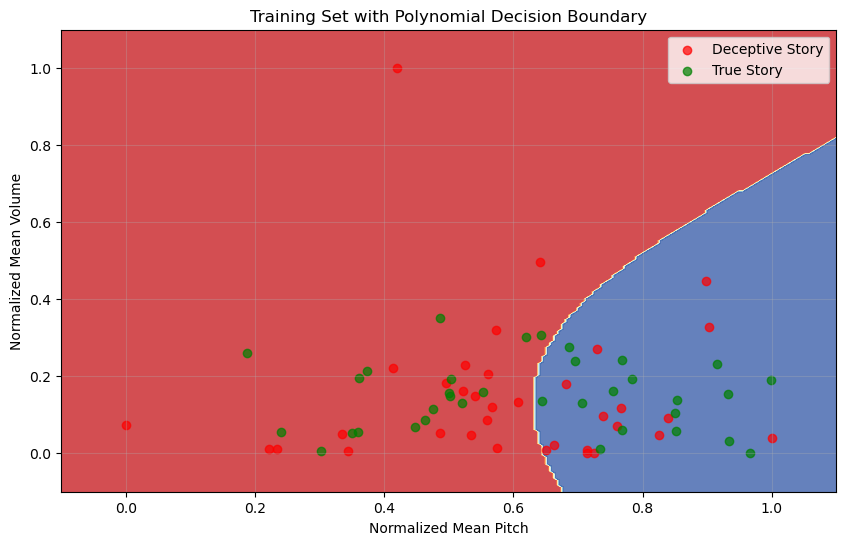

In [317]:
x_min, x_max = X_train_normalized[:, 0].min() - 0.1, X_train_normalized[:, 0].max() + 0.1
y_min, y_max = X_train_normalized[:, 1].min() - 0.1, X_train_normalized[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_points_poly = poly.transform(grid_points)

Z = log_reg_poly.predict(grid_points_poly)
Z = Z.reshape(xx.shape)

# the boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)

plt.scatter(X_train_normalized[y_train == 0, 0], X_train_normalized[y_train == 0, 1], color='red', label='Deceptive Story', alpha=0.7)
plt.scatter(X_train_normalized[y_train == 1, 0], X_train_normalized[y_train == 1, 1], color='green', label='True Story', alpha=0.7)

plt.title("Training Set with Polynomial Decision Boundary")
plt.xlabel("Normalized Mean Pitch")
plt.ylabel("Normalized Mean Volume")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

This is not an effective boundary... Optimization is necessary.

**6.1.1.3 Testing**

In [318]:
y_test_pred = log_reg_poly.predict(X_test_poly)
y_test_proba = log_reg_poly.predict_proba(X_test_poly)[:, 1]
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"acc (testing set): {test_accuracy:.2f}")

acc (testing set): 0.33


**6.1.1.4 Optimization**

From Lab3, we learned 2 approaches to optimize our logistic model: **Exhaustive search & Gradient descent**

define Negative Log-Likelihood:

$$
-\log L = - \sum_{i=1}^{N}\ [\ y_i\log{y_i} + (1-y_i)\log{(1-y_i)} \ ]
$$

That is:

In [319]:
def negLogLikelihood(X, w, y):
    predictions = expit(np.dot(X, w))  # Logistic sigmoid
    epsilon = 1e-15
    predictions = np.clip(predictions, epsilon, 1 - epsilon)
    return -np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))

The **gradient** of logistic regression is:

$$
\nabla(-\log L) = -X^T \cdot (y - \hat{y})
$$

In [320]:
def gradNegLogLikelihood(X, w, y):
    predictions = expit(np.dot(X, w))  # Logistic sigmoid
    return -np.dot(X.T, (y - predictions).reshape(-1, 1)).ravel()

Here try to apply **Gradient descent** to find a optimal classifier

In [321]:
initial_w = np.zeros(X_train_poly.shape[1])

def error_func(w):  
    return negLogLikelihood(X_train_poly, w, y_train)

def grad_func(w):
    return gradNegLogLikelihood(X_train_poly, w, y_train)

path_ = [initial_w]

def make_minimize_cb(path=[]):
    def minimize_cb(xk):
        path.append(np.copy(xk))
    return minimize_cb

res = scipy.optimize.minimize(fun=error_func, x0=initial_w, jac=grad_func, 
                              tol=1e-6, callback=make_minimize_cb(path_))

# extract the optimal weights
solution_w = res.x
path_ = np.array(path_)

print("\nOptimized weights:", solution_w)
print("Final negative log-likelihood:", negLogLikelihood(X_train_poly, solution_w, y_train))


Optimized weights: [  -2.34354818   16.43781049    0.43246806  -44.20132835   23.33784344
   58.67765246   30.88238485   10.72192527 -156.90159737  -12.64872273]
Final negative log-likelihood: 40.781715255098106


Test the effect

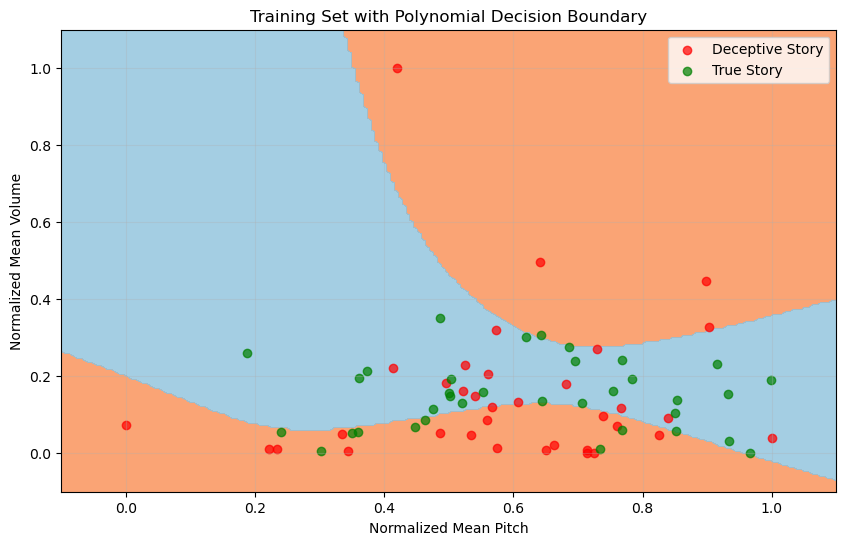

In [322]:
x_min, x_max = X_train_normalized[:, 0].min() - 0.1, X_train_normalized[:, 0].max() + 0.1
y_min, y_max = X_train_normalized[:, 1].min() - 0.1, X_train_normalized[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_points_poly = poly.transform(grid_points)

Z = expit(np.dot(grid_points_poly, solution_w)) >= 0.5
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)

plt.scatter(X_train_normalized[y_train == 0, 0], X_train_normalized[y_train == 0, 1], color='red', label='Deceptive Story', alpha=0.7)
plt.scatter(X_train_normalized[y_train == 1, 0], X_train_normalized[y_train == 1, 1], color='green', label='True Story', alpha=0.7)

plt.title("Training Set with Polynomial Decision Boundary")
plt.xlabel("Normalized Mean Pitch")
plt.ylabel("Normalized Mean Volume")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


Estimation

After optimization, check if the model works better.

acc (testing set): 0.53


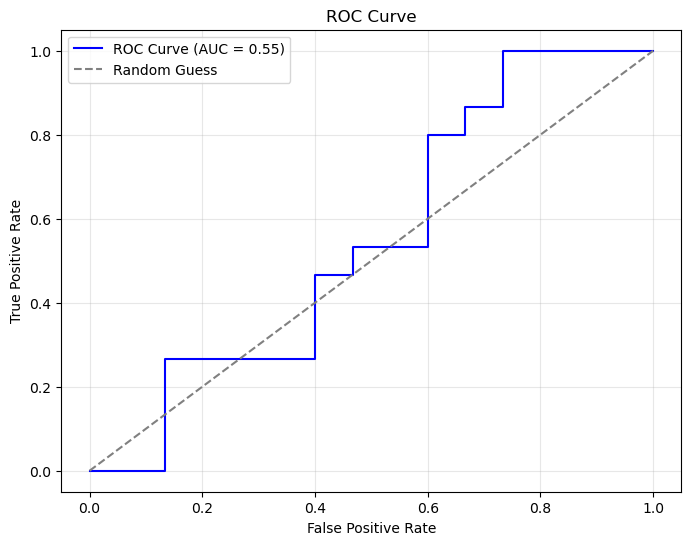

confusion matrix:
[[9 6]
 [8 7]]


In [323]:
y_test_pred = expit(np.dot(X_test_poly, solution_w)) >= 0.5
y_test_proba = expit(np.dot(X_test_poly, solution_w))

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"acc (testing set): {test_accuracy:.2f}")

# 绘制 ROC 曲线并计算 AUC
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Random Guess")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# 混淆矩阵
cm = confusion_matrix(y_test, y_test_pred)
print("confusion matrix:")
print(cm)


Although the accuracy has improved, 0.5 is a very unreliable accuracy in ML, since it's not much different from guessing. Let's try another approach.

#### 6.1.2 KNN


**6.1.2.1 Training**

In [324]:
k_values = [3, 5, 7, 9, 11]
knn_models = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_normalized, y_train)
    knn_models.append(knn_model)
    print(f"KNN with k={k} trained.")

KNN with k=3 trained.
KNN with k=5 trained.
KNN with k=7 trained.
KNN with k=9 trained.
KNN with k=11 trained.


**2.2.2 Draw the boundary**

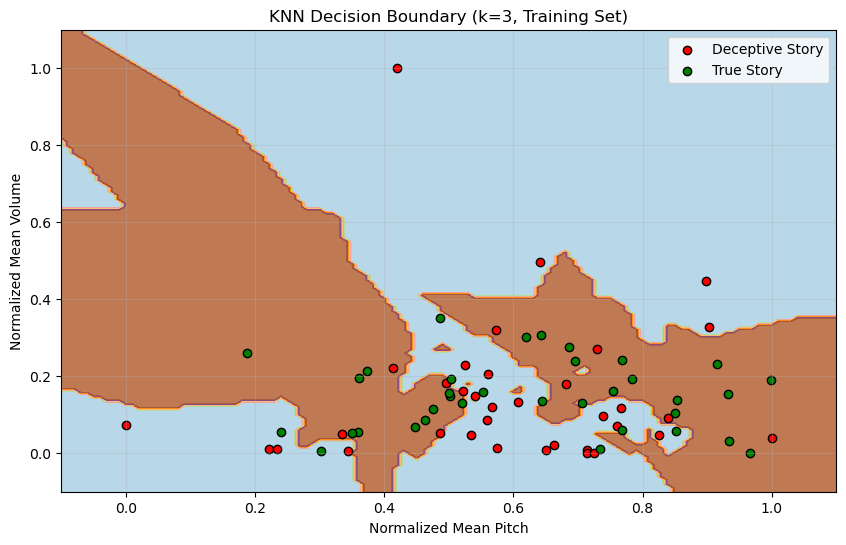

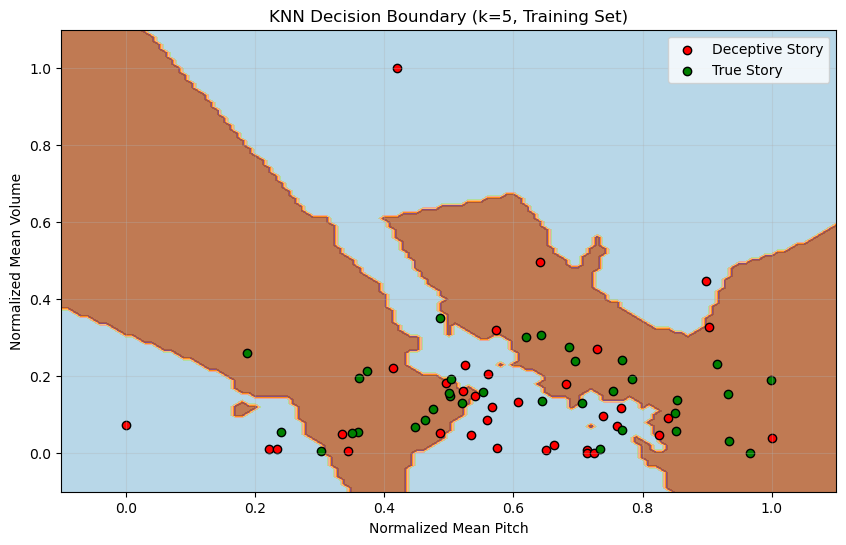

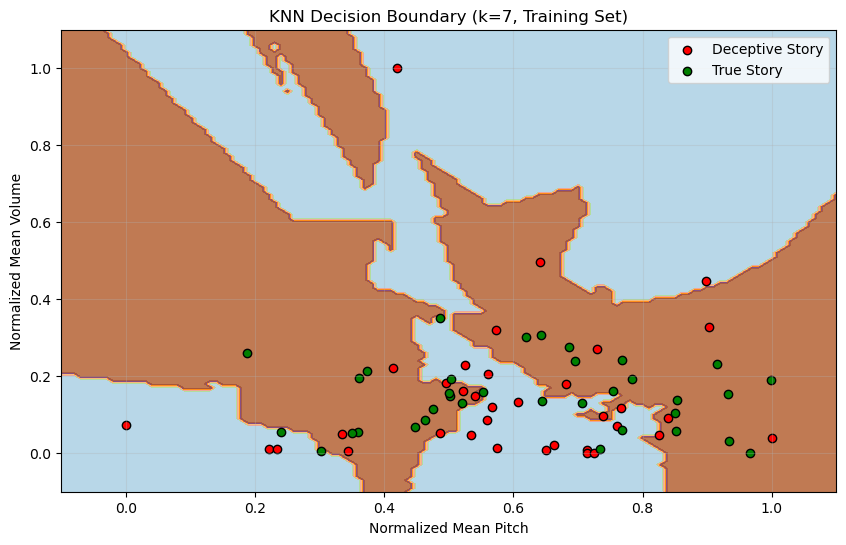

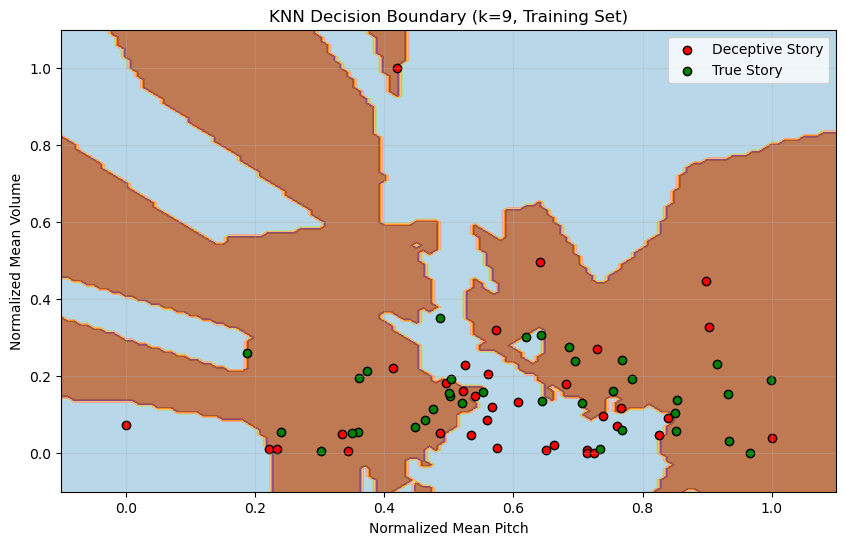

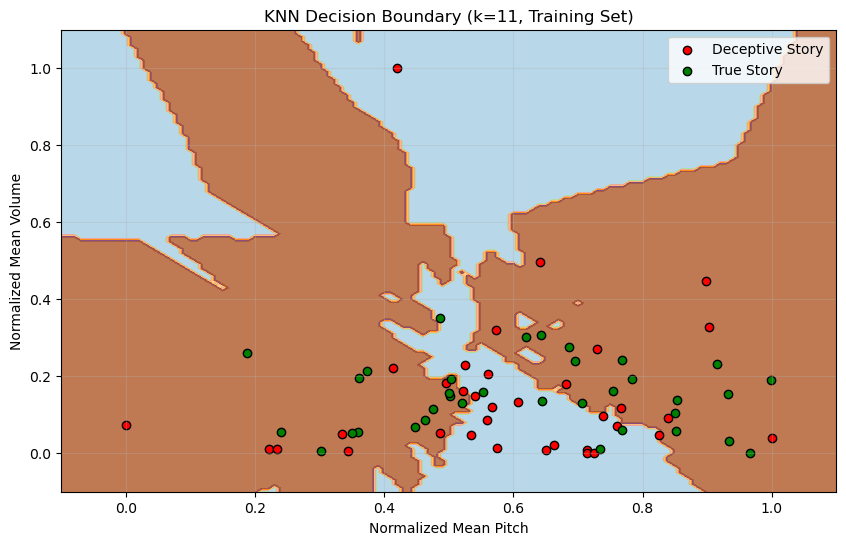

In [325]:
for i, k in enumerate(k_values):
    knn_model = knn_models[i]

    # 创建网格
    x_min, x_max = X_train_normalized[:, 0].min() - 0.1, X_train_normalized[:, 0].max() + 0.1
    y_min, y_max = X_train_normalized[:, 1].min() - 0.1, X_train_normalized[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # 预测网格点
    Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 绘制决策边界
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X_train_normalized[y_train == 0][:, 0], X_train_normalized[y_train == 0][:, 1], color='red', label='Deceptive Story', edgecolor='k')
    plt.scatter(X_train_normalized[y_train == 1][:, 0], X_train_normalized[y_train == 1][:, 1], color='green', label='True Story', edgecolor='k')
    plt.title(f"KNN Decision Boundary (k={k}, Training Set)")
    plt.xlabel('Normalized Mean Pitch')
    plt.ylabel('Normalized Mean Volume')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

Calculate the confusion matrix to test the effect on testing set

In [326]:
for i, k in enumerate(k_values):
    knn_model = knn_models[i]

    y_test_pred = knn_model.predict(X_test_normalized)

    conf_matrix = confusion_matrix(y_test, y_test_pred)

    print(f"Confusion matrix (k={k}):\n{conf_matrix}")

Confusion matrix (k=3):
[[ 8  7]
 [10  5]]
Confusion matrix (k=5):
[[8 7]
 [8 7]]
Confusion matrix (k=7):
[[6 9]
 [8 7]]
Confusion matrix (k=9):
[[ 5 10]
 [ 6  9]]
Confusion matrix (k=11):
[[ 5 10]
 [ 7  8]]


In [327]:
for i, k in enumerate(k_values):
    knn_model = knn_models[i]

    # 预测概率
    y_test_prob = knn_model.predict_proba(X_test_normalized)[:, 1]  # 概率值

    # 计算 ROC 曲线和 AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
    roc_auc = auc(fpr, tpr)

    print(f"AUC (k={k}): {roc_auc:.2f}")

AUC (k=3): 0.44
AUC (k=5): 0.46
AUC (k=7): 0.45
AUC (k=9): 0.49
AUC (k=11): 0.43


AUC tells us that the performance of KNN is also not satisfactory. The main reason is that there are too few features

#### 6.2 26-features

In this stage, we implemented an ensemble approach that combines two complementary machine learning models: Random Forest and Logistic Regression. The objective of this ensemble is to leverage the strengths of both models to improve classification performance and generalization ability.

In [328]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

random_forest = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(estimator=random_forest, param_grid=param_grid_rf, 
                              cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search_rf.fit(X_train_normalized2, y_train2)

best_params_rf = grid_search_rf.best_params_
best_random_forest = grid_search_rf.best_estimator_

print("Best params for random forest:", best_params_rf)

y_pred_rf = best_random_forest.predict(X_test_normalized2)
y_proba_rf = best_random_forest.predict_proba(X_test_normalized2)[:, 1]

rf_accuracy = accuracy_score(y_test2, y_pred_rf)
print(f"acc(random forest): {rf_accuracy:.2f}")

print("\nreport:")
print(classification_report(y_test2, y_pred_rf))

# 混淆矩阵
cm_rf = confusion_matrix(y_test2, y_pred_rf)
print("\nconfusion matrix(random forest):")
print(cm_rf)


Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Best params for random forest: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
acc(random forest): 0.45

report:
              precision    recall  f1-score   support

           0       0.50      0.27      0.35        22
           1       0.43      0.67      0.52        18

    accuracy                           0.45        40
   macro avg       0.46      0.47      0.44        40
weighted avg       0.47      0.45      0.43        40


confusion matrix(random forest):
[[ 6 16]
 [ 6 12]]


Logistic model with optimization approach:

In [329]:
X_train2_bias = np.column_stack([np.ones(X_train_normalized2.shape[0]), X_train_normalized2])
X_test2_bias = np.column_stack([np.ones(X_test_normalized2.shape[0]), X_test_normalized2])

initial_w = np.zeros(X_train2_bias.shape[1])

def neg_log_likelihood(w, X, y):
    predictions = expit(np.dot(X, w))
    epsilon = 1e-15
    predictions = np.clip(predictions, epsilon, 1 - epsilon)
    return -np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))

def grad_neg_log_likelihood(w, X, y):
    predictions = expit(np.dot(X, w))
    return -np.dot(X.T, (y - predictions))

result = scipy.optimize.minimize(
    fun=neg_log_likelihood,
    x0=initial_w,
    args=(X_train2_bias, y_train2),
    method='BFGS',  # BFGS optimization algorithm
    jac=grad_neg_log_likelihood,
    options={'disp': True, 'maxiter': 1000}
)

optimized_w = result.x
print("weights of logistic regression after optimization:", optimized_w)

def logistic_regression_predict(X, w):
    probabilities = expit(np.dot(X, w))
    return (probabilities >= 0.5).astype(int)

# estimation
y_pred_lr = logistic_regression_predict(X_test2_bias, optimized_w)
y_proba_lr = expit(np.dot(X_test2_bias, optimized_w))

lr_accuracy = accuracy_score(y_test2, y_pred_lr)
print(f"acc(logistic regression): {lr_accuracy:.2f}")

print("\nreport:")
print(classification_report(y_test2, y_pred_lr))

# 混淆矩阵
cm_lr = confusion_matrix(y_test2, y_pred_lr)
print("\nconfusion matrix(logistic model):")
print(cm_lr)


Optimization terminated successfully.
         Current function value: 26.607158
         Iterations: 110
         Function evaluations: 114
         Gradient evaluations: 114
weights of logistic regression after optimization: [ -7.58124124  -2.81027893  -2.31578792   5.16888244  -5.3622204
  -1.35494825   4.4673607    2.25839513   3.86618197   0.97735319
  -1.35143026   5.50367154  -0.05431899   5.06978945  -6.03106492
   2.84756332  18.61113573 -18.45887506   1.2137699   -2.65433814
  -1.40959739   3.92715755  -7.52040304 -53.8118769   51.42713014
   0.          -1.02846423]
acc(logistic regression): 0.60

report:
              precision    recall  f1-score   support

           0       0.69      0.50      0.58        22
           1       0.54      0.72      0.62        18

    accuracy                           0.60        40
   macro avg       0.61      0.61      0.60        40
weighted avg       0.62      0.60      0.60        40


confusion matrix(logistic model):
[[11 11]
 [ 5 

 Ensemble Stage(soft voting)

In [330]:
class LogisticRegressionCustom(BaseEstimator, ClassifierMixin):
    def __init__(self, w):
        self.w = w

    def fit(self, X, y):
        pass

    def predict(self, X):
        X_bias = np.column_stack([np.ones(X.shape[0]), X])
        return logistic_regression_predict(X_bias, self.w)

    def predict_proba(self, X):
        X_bias = np.column_stack([np.ones(X.shape[0]), X])
        probabilities = expit(np.dot(X_bias, self.w))
        return np.column_stack([1 - probabilities, probabilities])

optimized_log_reg = LogisticRegressionCustom(w=optimized_w)

voting_ensemble = VotingClassifier(
    estimators=[
        ('random_forest', best_random_forest),
        ('logistic_regression', optimized_log_reg)
    ],
    voting='soft'  # soft voting
)

voting_ensemble.fit(X_train_normalized2, y_train2)

y_pred_ensemble = voting_ensemble.predict(X_test_normalized2)
y_proba_ensemble = voting_ensemble.predict_proba(X_test_normalized2)[:, 1]

ensemble_accuracy = accuracy_score(y_test2, y_pred_ensemble)
print(f"acc(ensemble): {ensemble_accuracy:.2f}")

print("\nreport:")
print(classification_report(y_test2, y_pred_ensemble))

# 混淆矩阵
cm_ensemble = confusion_matrix(y_test2, y_pred_ensemble)
print("\nconfusion matrix:")
print(cm_ensemble)


acc(ensemble): 0.62

report:
              precision    recall  f1-score   support

           0       0.73      0.50      0.59        22
           1       0.56      0.78      0.65        18

    accuracy                           0.62        40
   macro avg       0.65      0.64      0.62        40
weighted avg       0.66      0.62      0.62        40


confusion matrix:
[[11 11]
 [ 4 14]]


***Compared to operating separately, both ACC and confusion matrix have improved***

**Draw ROC curves**

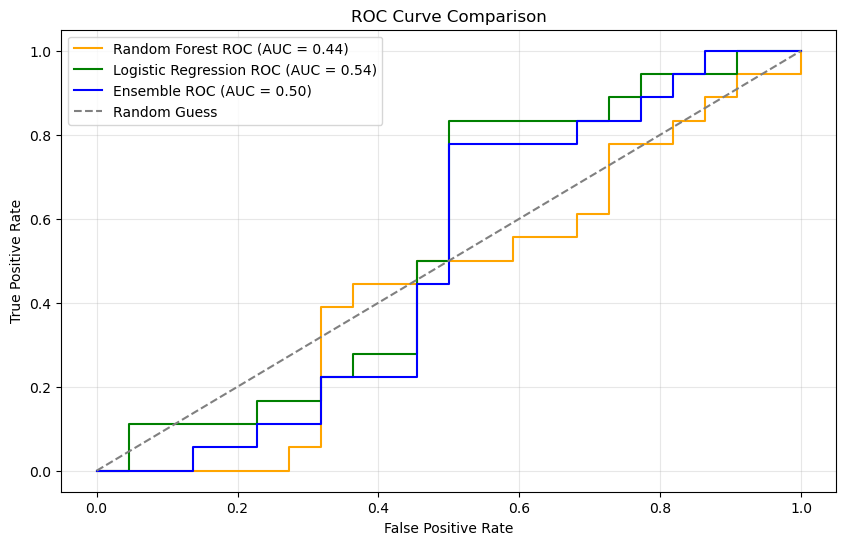

In [331]:
fpr_rf, tpr_rf, _ = roc_curve(y_test2, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_lr, tpr_lr, _ = roc_curve(y_test2, y_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_ensemble, tpr_ensemble, _ = roc_curve(y_test2, y_proba_ensemble)
roc_auc_ensemble = auc(fpr_ensemble, tpr_ensemble)

plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest ROC (AUC = {roc_auc_rf:.2f})", color='orange')
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression ROC (AUC = {roc_auc_lr:.2f})", color='green')
plt.plot(fpr_ensemble, tpr_ensemble, label=f"Ensemble ROC (AUC = {roc_auc_ensemble:.2f})", color='blue')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Random Guess")
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

From the ROC curve, this is still not a good model T.T

# 7 Conclusions

Your conclusions, suggestions for improvements, etc should go here.

Starting from a few simple features to 26 complex features, the trained models did not perform well. Whether it's ACC, confusion matrix, ROC, or AUC, the results all indicate that the classifier failed to classify them because despite being the best, the accuracy was only slightly higher than **0.5**, which is very, very annoying in ML.

i.e. The classifier cannot distinguish stories based on the extracted features trained on the model. Reasons may be:

- The training data sample size is too small to cover the diversity of the target distribution, resulting in the model being unable to learn effective patterns.
- The data may contain noise, label errors, irrelevant samples, or low-quality samples.
- The sample of the data is not specific enough. When we entered the data, we clearly inputted labels such as the credibility of the story and the emotions of the narrator, but did not provide them to us, which makes it much more difficult to get appropriate features.
- The extracted features failed to effectively reflect the essence of the target variable (true/false story).
- Of course, it may also be that the model is not very suitable, and some more complex and advanced models may perform better.


***Although current implementation has demonstrated the feasibility of using audio features to classify real and deceptive stories, there is still significant room for improvement. If data limitations can be addressed, feature extraction can be enhanced, and more advanced models and training techniques can be utilized, perhaps a more accurate and universal system can be constructed.***

# 8 References


```bash
# Core Libraries
numpy # For numerical operations and array manipulations
pandas # For data manipulation and analysis
librosa # For audio analysis and feature extraction

# Preprocessing and Feature Engineering
scikit-learn.preprocessing # For scaling and polynomial feature transformation
scikit-learn.model_selection # For splitting datasets and cross-validation
scipy.special # For mathematical functions (e.g., sigmoid function)

# Machine Learning Models
scikit-learn.linear_model # For Logistic Regression
scikit-learn.ensemble # For RandomForestClassifier and VotingClassifier
scikit-learn.neighbors # For K-Nearest Neighbors (KNN)

# Model Tuning and Optimization
scikit-learn.model_selection # For hyperparameter tuning (GridSearchCV)
scipy.optimize # For optimization (gradient descent, minimization)

# Metrics and Evaluation
scikit-learn.metrics # For model performance metrics (e.g., accuracy, AUC, confusion matrix)

# Visualization
matplotlib.pyplot # For creating visualizations (e.g., plots, charts)
seaborn # For advanced data visualization and heatmaps

# Custom Class Definitions
scikit-learn.base # For creating custom estimators and classifiers
```